# House Price Project

## 1. Define the Problem   With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each homeing the model based on new insights or data.


## 2. Gather and Explore the Data

- Data Collection: Collect the relevant dataset(s).
- Exploratory Data Analysis (EDA): Analyze the data to understand its structure, distributions, patterns, and anomalies.
- Data Visualization: Use plots and graphs to visualize relationships between variables. 
oms


## 3. Data Preprocessing

* **Simple Steps**
    * what ever the dataset
    * check the dimensions(shape ) of the dataset.
    * check the numerical features and categorical features with select_dtypes
    * check the skewness of numerical features and fix it with box cox transformations
    * transform numerical features to categorical features like year and months
    * create new features if needed
    * find the missing values in both num and cat features and fill with appropriate values like mean,median,mode
    * encode the cat features with onehotencoder, labelencoder
    * scale the features with standardscaler,robust scaler
    * and fit it with the estimator
    * if needed do features_selection for the most imp features
    * ifneeded regularization of features
    * hence it is completely iterative process to get the best model.
    * 
 to get the best model.

* Data Cleaning: Handle missing values, remove duplicates, and correct errors.
* Feature Engineering: Create new features or modify existing ones to i* ove the model's performance.
* Data Transformation: Normalize, standardize, or encode categorical variables.
* Splitting Data: Split the data into training, validation, and test sets.

## 4. Model Selection
* Choose a Model: Select the appropriate algorithm(s) based on the problem (e.g., linear regression, decision trees, neural networks).
* Baseline Model: Create a simple baseline model for comparison.



## 5. Model Training
* Fit the Model: Train the model using the training data.
* Hyperparameter Tuning: Optimize the model’s parameters to improve performance. Techniques like Grid Search or Random Search can be useful.

## 6. Model Evaluation
   - Validation: Use the validation set to evaluate the model's performance. Adjust the model based on validation results.
   - Performance Metrics: Choose the right metrics for evaluation (e.g., accuracy, precision, recall, F1-score, RMSE, etc.).
   - Cross-Validation: Use cross-validation to assess the model’s robustness.

## 7. Model Testing
   - Final Evaluation: Test the model on the test set to obtain the final performance score.
   - Compare with Baseline: Compare the final model with the baseline to assess improvement.

## 8. Model Interpretation
   - Interpret Results: Understand the model’s predictions and the importance of different features.
   - Visualization: Use visual tools like confusion matrices, ROC curves, and feature importance plots to interpret the model.

## 9. Model Deployment (if applicable)
   - Deploy the Model: If the project requires it, deploy the model into a production environment.
   - Monitor: Continuously monitor the model’s performance and retrain it as necessary.

## 10. Documentation and Reporting
   - Document the Process: Keep detailed records of the methods, parameters, and results.
   - Report Findings: Present your findings and the model's performance in a clear, understandable manner.

## 11. Iteration
   - Refinement: Iterate on the process, refining the model based on new insights or data.


## 2 Gather and Explore the data

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('datas/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('datas/test.csv')
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
df_total = pd.concat([test.assign(ind="test"), train.assign(ind="train")])
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [6]:
df_total.MSSubClass.value_counts()

MSSubClass
20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

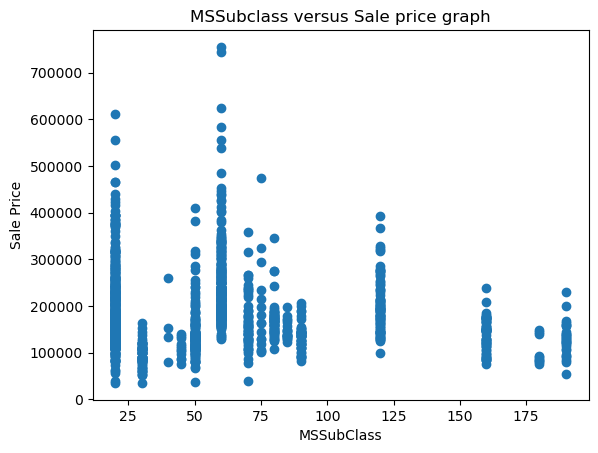

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=train.MSSubClass, y=train.SalePrice)
ax.set(title='MSSubclass versus Sale price graph',
       xlabel='MSSubClass',
       ylabel='Sale Price');

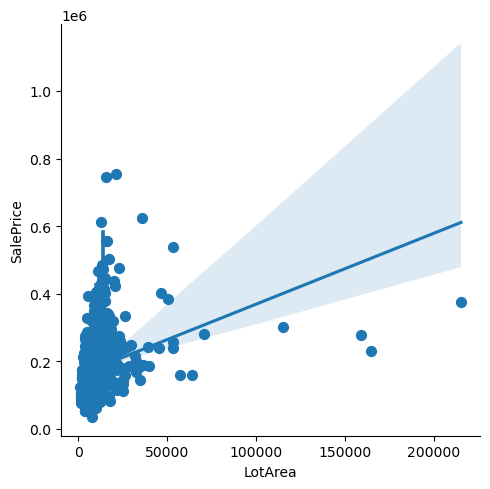

In [8]:
sns.lmplot(x="LotArea", y="SalePrice", data=train, x_estimator=np.mean);

* We can see that when the lot area increase the SalePrice increases

## Explore Data for numeric columns

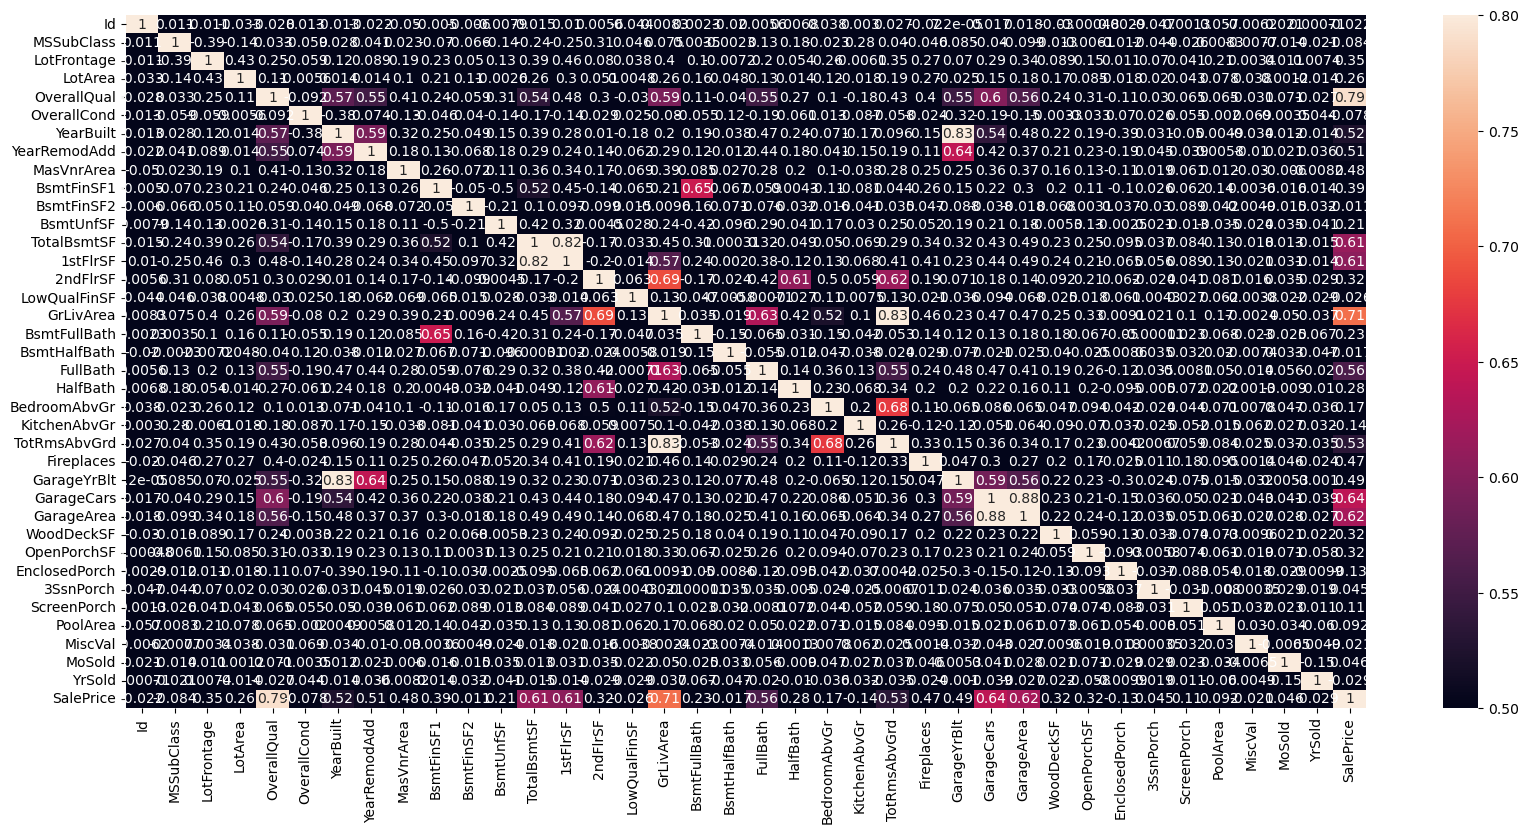

In [9]:
corrmat = train.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, vmin=.5,vmax=.8,annot=True);

with this we can see that **Garage Area, GarageCars, GrLivArea, TotalbsmtSF, OverallQuall** are so effective for the model

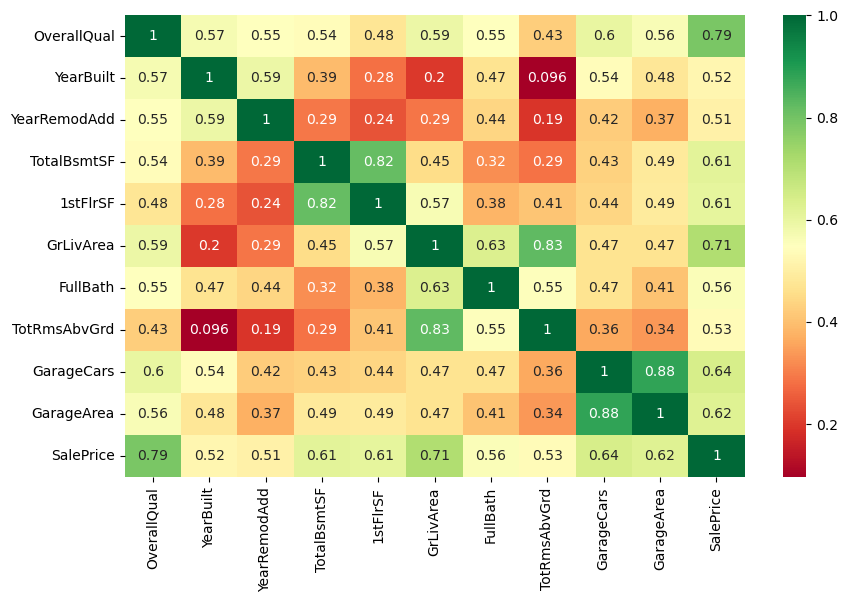

In [10]:
# Let's check in another way
corr_m = train.corr(numeric_only=True)
top_corr_features = corr_m.index[abs(corr_m['SalePrice'] > 0.50)]
fig, ax = plt.subplots(figsize=(10,6))
new_corr = train[top_corr_features].corr(numeric_only=True)
sns.heatmap(new_corr, annot=True, cmap="RdYlGn");

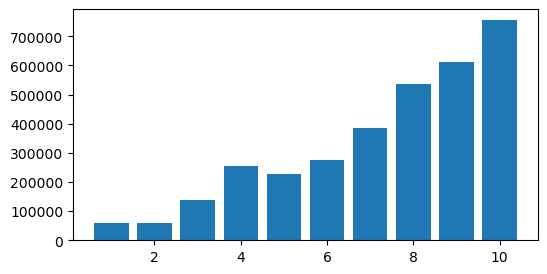

In [11]:
fig, ax = plt.subplots(figsize=(6,3))
ax.bar(train.OverallQual, train.SalePrice);

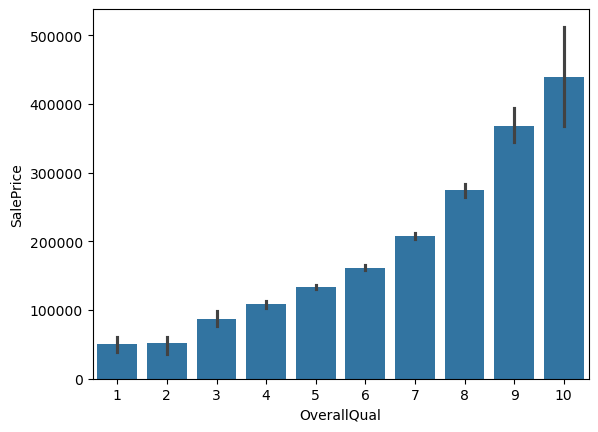

In [12]:
# With sns
sns.barplot(x=train.OverallQual, y=train.SalePrice);

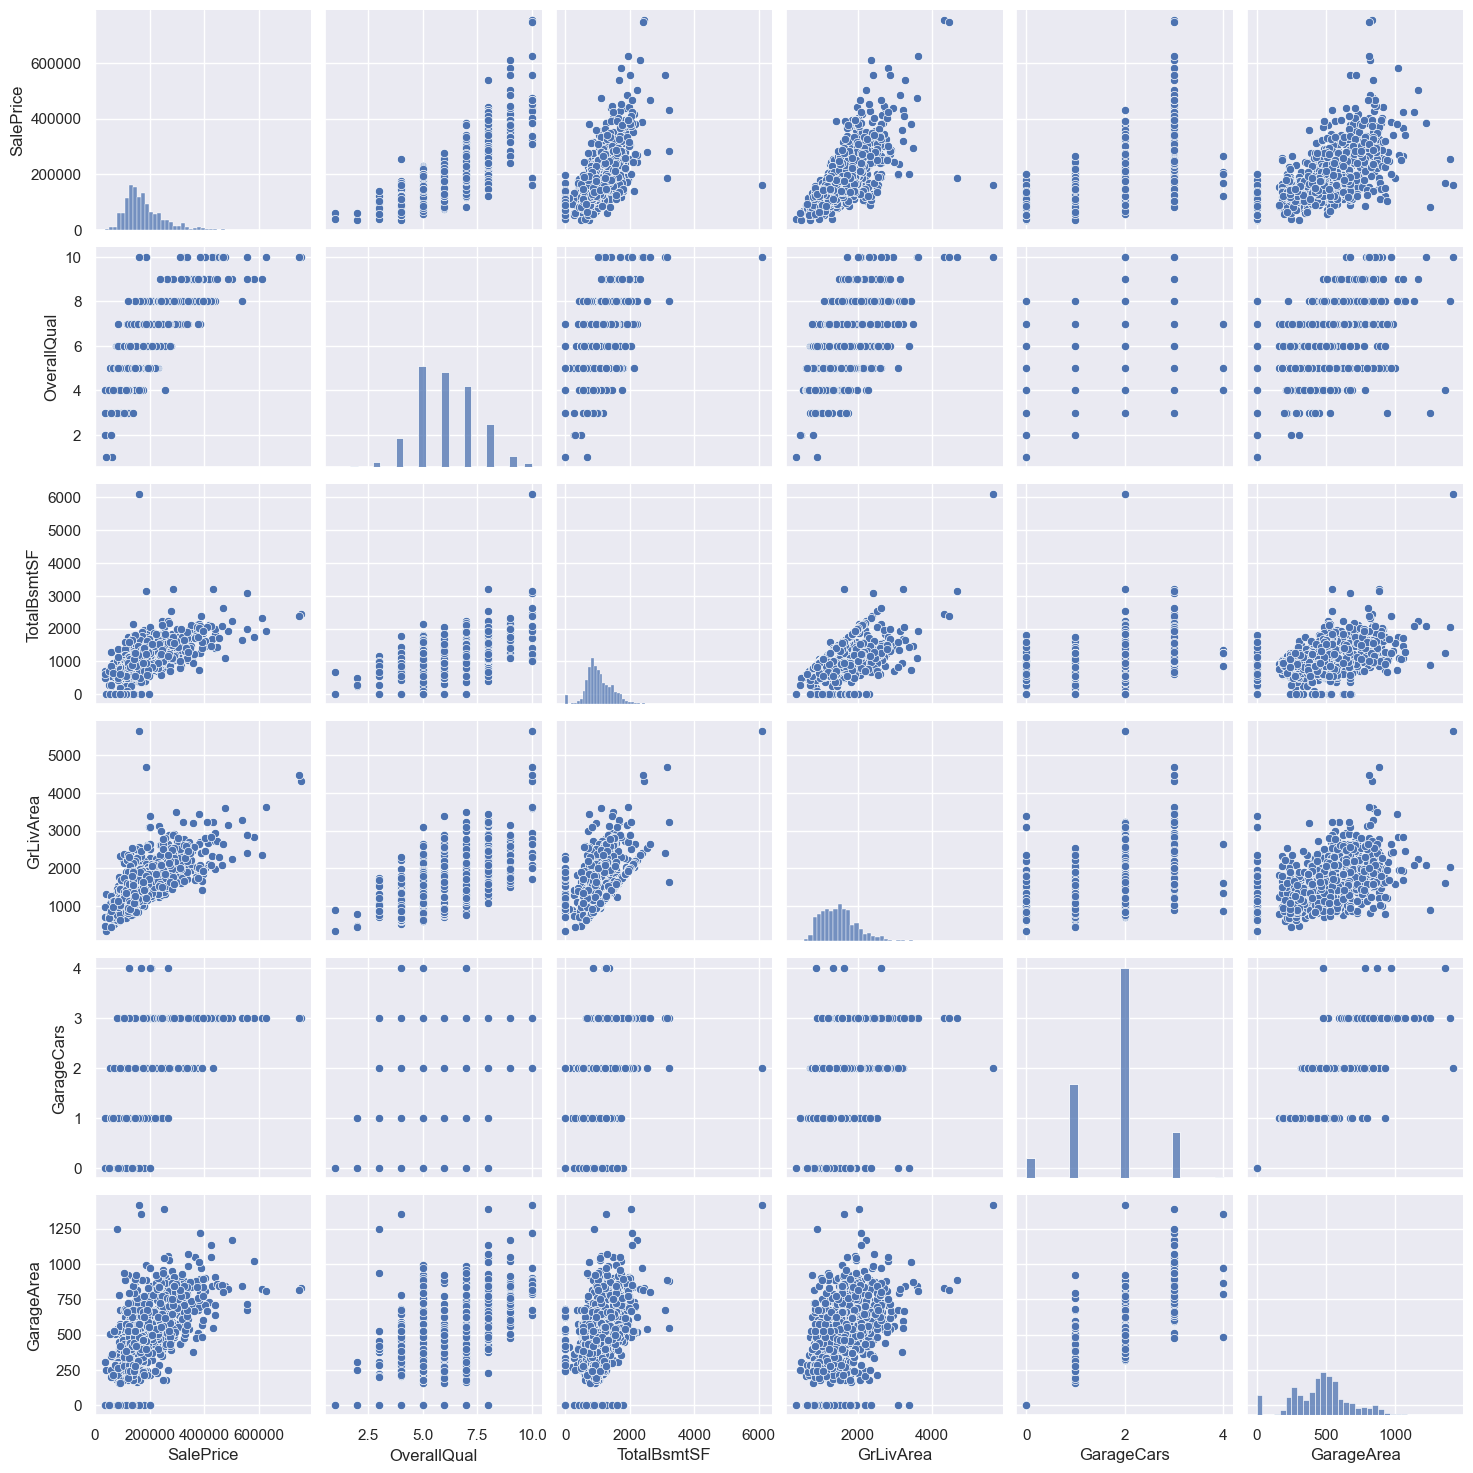

In [13]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'TotalBsmtSF',
       'GrLivArea', 'GarageCars', 'GarageArea',]
sns.pairplot(train[columns]);

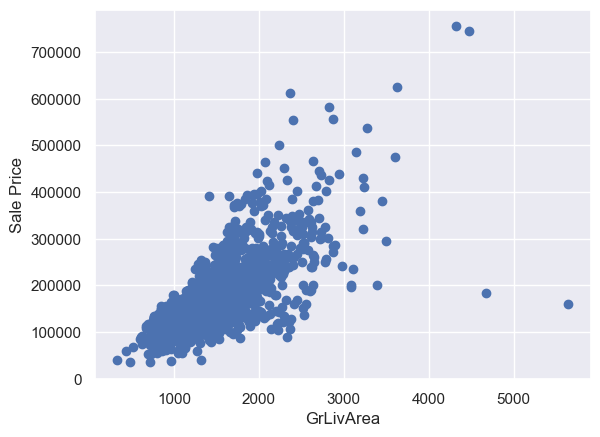

In [14]:
fig , ax = plt.subplots()
ax.scatter(train.GrLivArea, train.SalePrice);
ax.set(xlabel='GrLivArea', ylabel='Sale Price');
# We can see the outlier in the below image

## Explore data for categorical 

In [15]:
df_total_nulls = df_total.isna().sum()
df_total_nulls = df_total_nulls[df_total_nulls > 0]
df_total_nulls = df_total_nulls.sort_values(ascending=False)
df_total_nulls

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

Lets Check how important PoolQC

In [16]:
non_nulls =[]
for key in train.keys():
    if train[key].dtype == 'O':
        if train[key].isna().sum() < 1:
            non_nulls.append(key)

print(non_nulls)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [17]:
train[non_nulls]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


In [18]:
small_array = ['SaleType', 'SaleCondition']

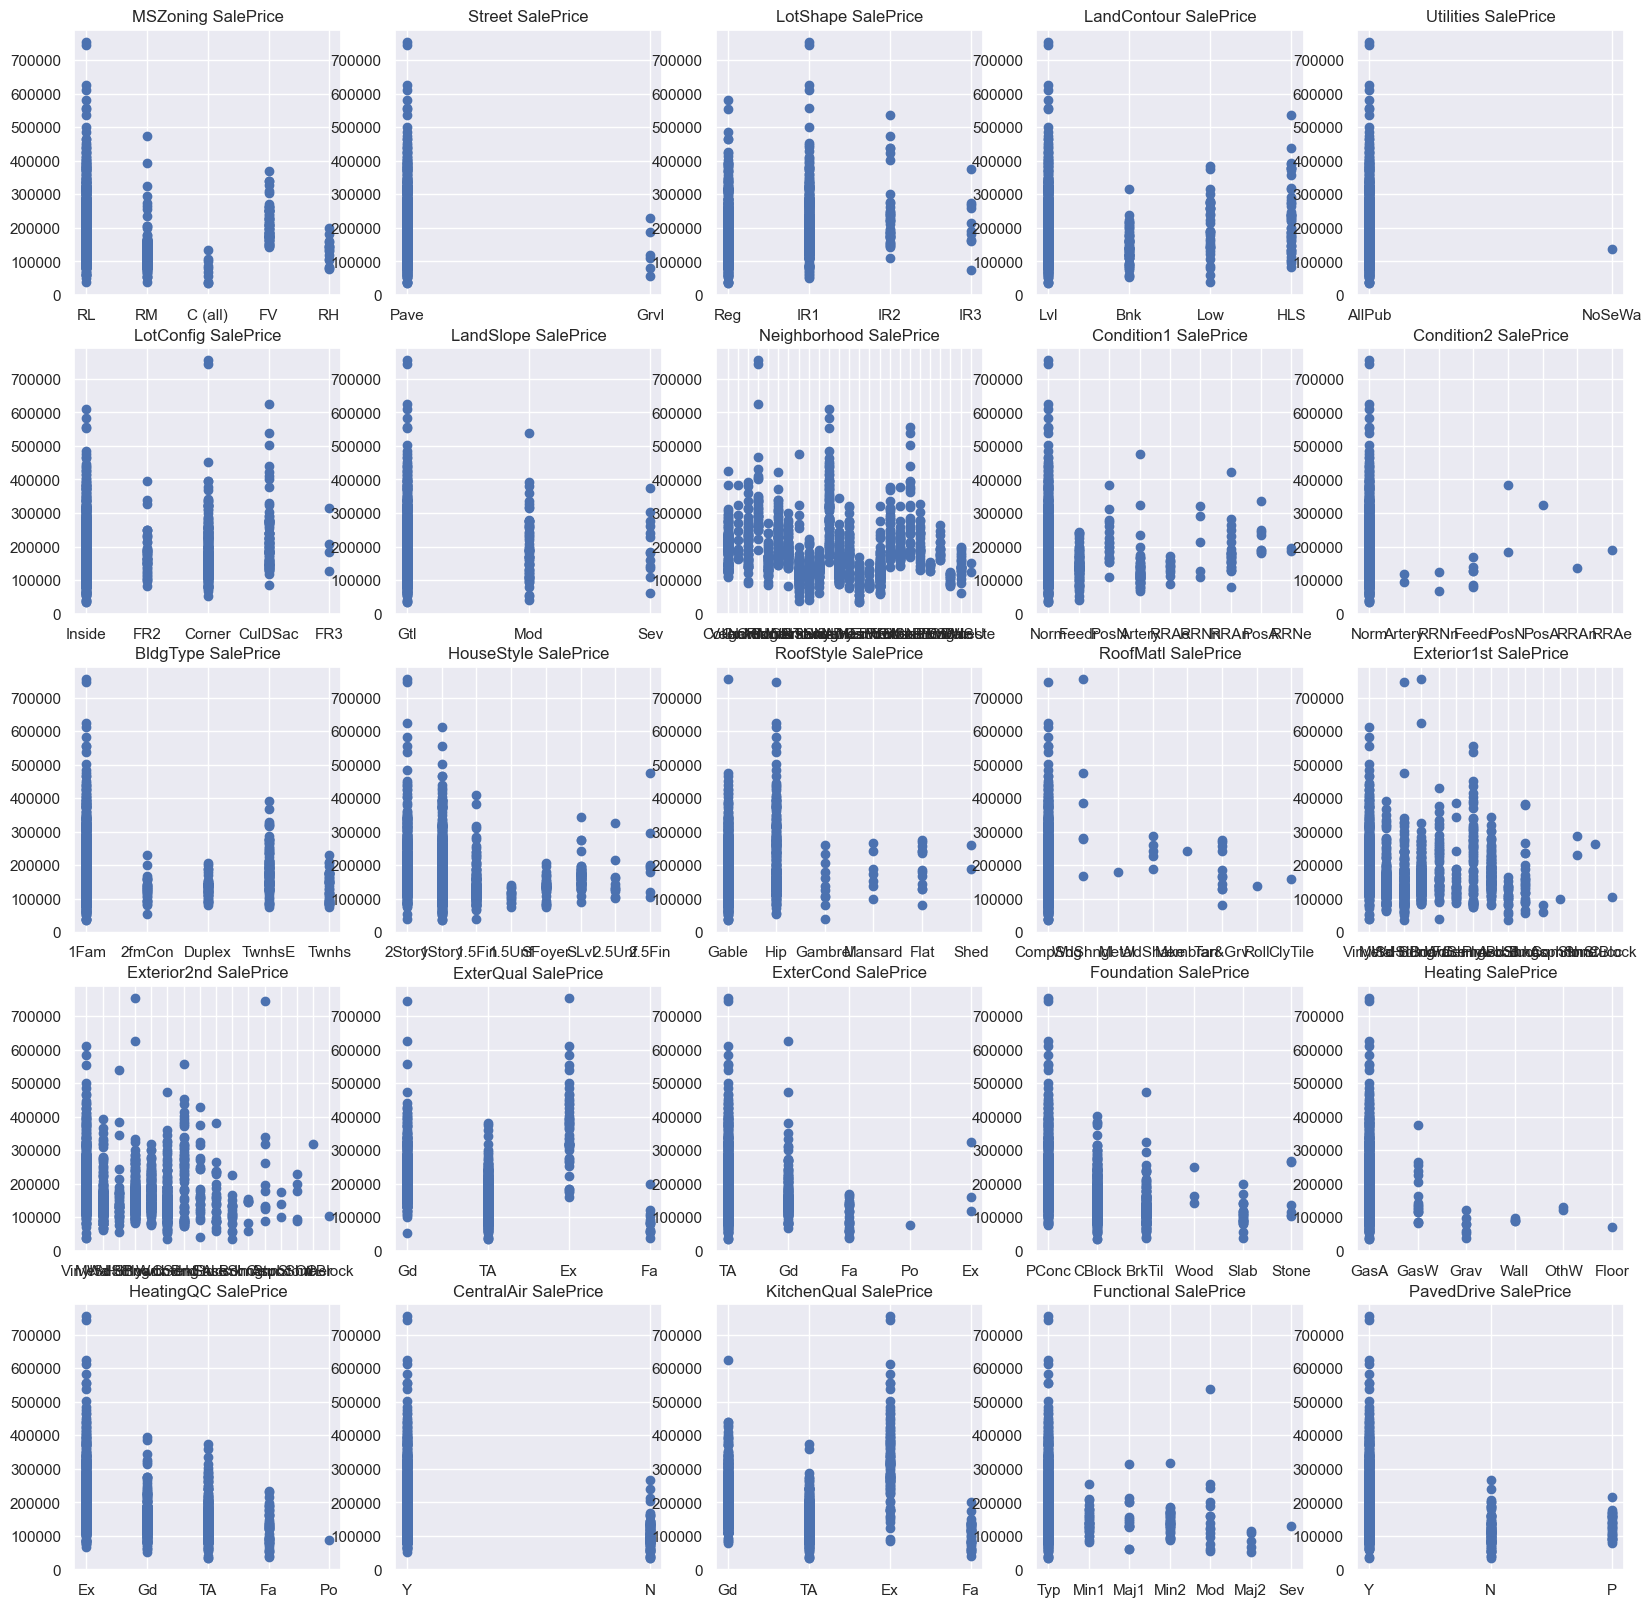

In [19]:
def show_plot_category(df, features):
    fig, ax = plt.subplots(figsize=(20,20), ncols=5, nrows=5)
    n = 0
    for i in range(5):
        for j in range(5):
            ax[i,j].scatter(x = df[features[n]], y = df['SalePrice'])
            ax[i,j].set(title=features[n]+" SalePrice")
            n = n+1

show_plot_category(train, non_nulls)

In [20]:
with_nulls =[]
for key in train.keys():
    if train[key].dtype == 'O':
        if train[key].isna().sum() > 0:
            with_nulls.append(key)

print(with_nulls)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


## 3. DataPreprocessing

In [21]:
train['MSSubClass'].dtype

dtype('int64')

In [22]:
# Some of the non-numeric predictors are stored as numbers; convert them into strings 
df_total['MSSubClass'] = df_total['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df_total['OverallCond'] = df_total['OverallCond'].astype(str)
df_total['OverallQual'] = df_total['OverallQual'].astype(str)

#Year and month sold are transformed into categorical features.
df_total['YrSold'] = df_total['YrSold'].astype(str)
df_total['MoSold'] = df_total['MoSold'].astype(str)

### Checkin is labelencoder working correctly

In [23]:
from sklearn.preprocessing import LabelEncoder
replica_df = train['HeatingQC']
replica_df = pd.DataFrame(replica_df)
lb = LabelEncoder()
replica_df['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [24]:
replica_df['HeatingQC'] = lb.fit_transform(replica_df['HeatingQC'])
replica_df['HeatingQC'].value_counts()

HeatingQC
0    741
4    428
2    241
1     49
3      1
Name: count, dtype: int64

This show us we should use mapping 

### Splitting Neighborhood into 3 part

In [25]:
neighboor_good = []
neighboor_average = []
neighboor_bad = []

# Bring the all label and turn them unique variables.
neighbours = np.array(train['Neighborhood'].values)
my_list = list(set(neighbours))

for label in my_list:
    mean_neigh = np.mean(train[train['Neighborhood'] == label].SalePrice)
    if mean_neigh > 220000:
        neighboor_good.append(label)
    elif mean_neigh > 175000 and mean_neigh < 220000:
        neighboor_average.append(label)
    elif mean_neigh < 175000:
        neighboor_bad.append(label)

len(my_list), len(neighboor_good), len(neighboor_average), len(neighboor_bad)

(25, 6, 7, 12)

In [26]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   object 
 18  OverallCond  

In [27]:
neigh_array = []
for label in df_total.Neighborhood:
    if label in neighboor_good:
        neigh_array.append(3)
    elif label in neighboor_average:
        neigh_array.append(2)
    elif label in neighboor_bad:
        neigh_array.append(1)

In [28]:
df_total.Neighborhood = neigh_array

In [29]:
df_total.Neighborhood.value_counts()

Neighborhood
1    1490
2     863
3     566
Name: count, dtype: int64

In [30]:
# Lets find categorical and numerical features
numerical_features = []
categorical_features = []

for label, key in df_total.items():
    if key.dtypes != 'O':
        numerical_features.append(label)

for label, key in df_total.items():
    if key.dtypes == 'O':
        categorical_features.append(label)

len(numerical_features), len(categorical_features)

(34, 48)

In [31]:
# Check wich categorical columns are empty and how much
def calculate_empty_object():
    nulls = {}
    for label, key in df_total.items():
        if key.dtypes == 'O' and key.isna().sum() > 0:
            nulls[label] = key.isna().sum()

    return nulls

def calculate_empty_numerical():
    nulls = {}
    for label, key in df_total.items():
        if key.dtypes != 'O' and key.isna().sum() > 0:
            nulls[label] = key.isna().sum()

    return nulls

In [32]:
print('Nulls for Categorical')
print(calculate_empty_object())
print('Nulls for Numerical')
print(calculate_empty_numerical())

Nulls for Categorical
{'MSZoning': 4, 'Alley': 2721, 'Utilities': 2, 'Exterior1st': 1, 'Exterior2nd': 1, 'MasVnrType': 1766, 'BsmtQual': 81, 'BsmtCond': 82, 'BsmtExposure': 82, 'BsmtFinType1': 79, 'BsmtFinType2': 80, 'Electrical': 1, 'KitchenQual': 1, 'Functional': 2, 'FireplaceQu': 1420, 'GarageType': 157, 'GarageFinish': 159, 'GarageQual': 159, 'GarageCond': 159, 'PoolQC': 2909, 'Fence': 2348, 'MiscFeature': 2814, 'SaleType': 1}
Nulls for Numerical
{'LotFrontage': 486, 'MasVnrArea': 23, 'BsmtFinSF1': 1, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'GarageYrBlt': 159, 'GarageCars': 1, 'GarageArea': 1, 'SalePrice': 1459}


In [33]:
np.array(categorical_features)

array(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'ind'],
      dtype='<U13')

In [34]:
# For OneHotEncoder
nominal_cat = ['MSSubClass', 'MSZoning', 'Street', 'LotShape',  
              'LandContour', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
               'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType',  'PavedDrive',
                'MoSold', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond' , 'YrSold'] 

# For Label Encoder
ordinal_cat = ['LandSlope', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'Fence', 'ind', 
               'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond',
              'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual'] 


# For dropping column
drop_column = ['BsmtFinType2', 'PoolQC', 'Utilities','MiscFeature', 'Alley',]

In [35]:
# Drop unimpact columns
df_total = df_total.drop('BsmtFinType2', axis=1)
df_total = df_total.drop('PoolQC', axis=1)
df_total = df_total.drop('Utilities', axis=1)
df_total = df_total.drop('MiscFeature', axis=1)
df_total = df_total.drop('Alley', axis=1)

In [36]:
# Lets fill some categorical columns

# Fill with Na where columns are empty with purpose
df_total['BsmtQual'] = df_total['BsmtQual'].fillna('Na')
df_total['BsmtCond'] = df_total['BsmtCond'].fillna('Na')
df_total['FireplaceQu'] = df_total['FireplaceQu'].fillna('Na')
df_total['GarageQual'] = df_total['GarageQual'].fillna('Na')
df_total['GarageCond'] = df_total['GarageCond'].fillna('Na')
df_total['Fence'] = df_total['Fence'].fillna('Na')
df_total['MasVnrType'] = df_total['MasVnrType'].fillna('Na')
df_total['BsmtExposure'] = df_total['BsmtExposure'].fillna('Na')
df_total['BsmtFinType1'] = df_total['BsmtFinType1'].fillna('Na')
df_total['GarageType'] = df_total['GarageType'].fillna('Na')
df_total['GarageFinish'] = df_total['GarageFinish'].fillna('Na')

# Fill with mode where unknown empties
df_total['MSZoning'] = df_total['MSZoning'].fillna(df_total['MSZoning'].mode()[0])
df_total['Exterior1st'] = df_total['Exterior1st'].fillna(df_total['Exterior1st'].mode()[0])
df_total['Exterior2nd'] = df_total['Exterior2nd'].fillna(df_total['Exterior2nd'].mode()[0])
df_total['Electrical'] = df_total['Electrical'].fillna(df_total['Electrical'].mode()[0])
df_total['KitchenQual'] = df_total['KitchenQual'].fillna(df_total['KitchenQual'].mode()[0])
df_total['Functional'] = df_total['Functional'].fillna(df_total['Functional'].mode()[0])
df_total['SaleType'] = df_total['SaleType'].fillna(df_total['SaleType'].mode()[0])

In [37]:
# Lets fill some numerical features

df_total['LotFrontage'] = df_total['LotFrontage'].fillna(0)
df_total['GarageYrBlt'] = df_total['GarageYrBlt'].fillna(0)
df_total['MasVnrArea'] = df_total['MasVnrArea'].fillna(0)
df_total['BsmtFinSF1'] = df_total['BsmtFinSF1'].fillna(0)
df_total['BsmtFinSF2'] = df_total['BsmtFinSF2'].fillna(0)
df_total['BsmtUnfSF'] = df_total['BsmtUnfSF'].fillna(0)
df_total['TotalBsmtSF'] = df_total['TotalBsmtSF'].fillna(0)
df_total['BsmtFullBath'] = df_total['BsmtFullBath'].fillna(0)
df_total['BsmtHalfBath'] = df_total['BsmtHalfBath'].fillna(0)
df_total['GarageCars'] = df_total['GarageCars'].fillna(0)
df_total['GarageArea'] = df_total['GarageArea'].fillna(0)

In [38]:
num_nulls = calculate_empty_numerical()
num_nulls

{'SalePrice': 1459}

In [39]:
cat_nulls = calculate_empty_object()
cat_nulls

{}

We can see that there is no empty value. There is only SalePrice but that's we want already !

In [40]:
# Double check
for label in df_total.keys():
    if df_total[label].isna().sum() > 0:
        print(label)

SalePrice


In [41]:
numeric_feat = df_total.dtypes[df_total.dtypes != "object"].index
numeric_feat = numeric_feat.drop(['Id', 'SalePrice'])

### Handle the skewness

In [42]:
from scipy.stats import skew

skewed_feats = df_total[numeric_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065


In [43]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_total[feat] = boxcox1p(df_total[feat], lam)
    df_total[feat] += 1

There are 32 skewed numerical features to Box Cox transform


In [45]:
df_total

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,7.221214,21.479373,Pave,Reg,Lvl,Inside,Gtl,...,8.020909,1.0,MnPrv,1.000000,6,2010,WD,Normal,test,NaN
1,1462,20,RL,7.244956,22.327220,Pave,IR1,Lvl,Corner,Gtl,...,1.000000,1.0,Na,21.777526,6,2010,WD,Normal,test,NaN
2,1463,60,RL,7.073289,22.196905,Pave,IR1,Lvl,Inside,Gtl,...,1.000000,1.0,MnPrv,1.000000,3,2010,WD,Normal,test,NaN
3,1464,60,RL,7.172972,20.865444,Pave,IR1,Lvl,Inside,Gtl,...,1.000000,1.0,Na,1.000000,6,2010,WD,Normal,test,NaN
4,1465,120,RL,6.093857,18.257255,Pave,IR1,HLS,Inside,Gtl,...,8.397498,1.0,Na,1.000000,1,2010,WD,Normal,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,6.744420,19.960528,Pave,Reg,Lvl,Inside,Gtl,...,1.000000,1.0,Na,1.000000,8,2007,WD,Normal,train,175000.0
1456,1457,20,RL,7.337529,21.994868,Pave,Reg,Lvl,Inside,Gtl,...,1.000000,1.0,MnPrv,1.000000,2,2010,WD,Normal,train,210000.0
1457,1458,70,RL,6.859551,20.476345,Pave,Reg,Lvl,Inside,Gtl,...,1.000000,1.0,GdPrv,15.892193,5,2010,WD,Normal,train,266500.0
1458,1459,20,RL,6.914940,20.760176,Pave,Reg,Lvl,Inside,Gtl,...,1.000000,1.0,Na,1.000000,4,2010,WD,Normal,train,142125.0


Lets check which column will we mapp 

In [46]:
ordinal_cat

['LandSlope',
 'BsmtExposure',
 'BsmtFinType1',
 'GarageFinish',
 'Fence',
 'ind',
 'BsmtQual',
 'BsmtCond',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'ExterQual',
 'ExterCond',
 'HeatingQC',
 'KitchenQual']

In [47]:
df_total.BsmtQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'Na'], dtype=object)

In [48]:
# Lets fill all the ordinal column with mapping

LandSlope_map = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
df_total['LandSlope'] = df_total['LandSlope'].map(LandSlope_map)

BsmtExposure_map = {'Na': 0, 'No': 1, 'Mn': 2, 'Av':3, 'Gd':4 }
df_total['BsmtExposure'] = df_total['BsmtExposure'].map(BsmtExposure_map) 

BsmtFinType1_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'Na': 0}
df_total['BsmtFinType1'] = df_total['BsmtFinType1'].map(BsmtFinType1_map)

GarageFinish_map = {'Na': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
df_total['GarageFinish'] = df_total['GarageFinish'].map(GarageFinish_map)

Fence_map = {'Na': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
df_total['Fence'] = df_total['Fence'].map(Fence_map)

BsmtQual_map = {'Na': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['BsmtQual'] = df_total['BsmtQual'].map(BsmtQual_map)

BsmtCond_map = {'Na': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['BsmtCond'] = df_total['BsmtCond'].map(BsmtCond_map)

FireplaceQu_map = {'Na': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['FireplaceQu'] = df_total['FireplaceQu'].map(FireplaceQu_map)

GarageQual_map = {'Na': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['GarageQual'] = df_total['GarageQual'].map(GarageQual_map)

GarageCond_map = {'Na': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['GarageCond'] = df_total['GarageCond'].map(GarageCond_map)

ExterQual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['ExterQual'] = df_total['ExterQual'].map(ExterQual_map)

ExterCond_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['ExterCond'] = df_total['ExterCond'].map(ExterCond_map)

HeatingQC_map= {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['HeatingQC'] = df_total['HeatingQC'].map(HeatingQC_map)

KitchenQual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df_total['KitchenQual'] = df_total['KitchenQual'].map(KitchenQual_map)

In [49]:
df_total['FullBath'].value_counts()

FullBath
2.194318    1530
1.730463    1309
2.540963      64
1.000000      12
2.820334       4
Name: count, dtype: int64

In [50]:
print(nominal_cat)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond', 'YrSold']


### Convert nominal cat according to LabelEncoder()

In [51]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
for label in nominal_cat:
    ohe_transform = ohe.fit_transform(df_total[[label]])
    df_total = pd.concat([df_total, ohe_transform], axis=1).drop(columns=[label])

In [52]:
# Checking all the columns
from IPython.display import display

pd.set_option('display.max_columns', None)
df_total

,Id,LotFrontage,LotArea,LandSlope,Neighborhood,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,ind,SalePrice,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Na,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Na,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,1461,7.221214,21.479373,3,1.730463,15.121376,15.121376,1.000000,3,3,3,3,1,3,11.105326,8.397498,9.780689,12.775114,3,12.818680,1.000000,1.0,12.818680,1.000000,1.0,1.730463,1.000000,2.194318,1.730463,3,3.055642,1.000000,0,15.121376,1,1.730463,12.259868,3,3,8.338607,1.000000,1.000000,1.0,8.020909,1.0,3,1.0000

In [53]:
nulls = {}
for label, key in df_total.items():
    if key.isna().sum() > 0:
        nulls[label] = key.isna().sum()

nulls

{'SalePrice': 1459}

In [54]:
train['FireplaceQu'].isna().sum()

690

In [55]:
df_total['ind'].value_counts()

ind
train    1460
test     1459
Name: count, dtype: int64

### Split into train and test part. The finish of preprocessing.

In [56]:
train, test = df_total[df_total['ind'] == 'train'], df_total[df_total['ind'] == 'test']

In [57]:
# drop the id column into train set
train = train.drop(columns=['Id', 'ind'])
test = test.drop(columns=['ind'])

In [58]:
train

,LotFrontage,LotArea,LandSlope,Neighborhood,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SalePrice,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Na,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Na,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,6.831328,20.212182,3,2.194318,15.187527,15.187527,9.059126,4,3,4,3,1,6,12.170327,1.000000,8.483296,12.692623,5,12.692623,12.686189,1.0,14.698888,1.730463,1.000000,2.194318,1.730463,2.540963,1.730463,4,3.602594,1.000000,0,15.187527,2,2.194318,11.506271,3,3,1.000000,6.714669,1.000000,1.0,1.0,1.0,0,1.000000,208500.0

In [59]:
test

,Id,LotFrontage,LotArea,LandSlope,Neighborhood,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SalePrice,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Na,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Na,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,1461,7.221214,21.479373,3,1.730463,15.121376,15.121376,1.000000,3,3,3,3,1,3,11.105326,8.397498,9.780689,12.775114,3,12.818680,1.000000,1.0,12.818680,1.000000,1.000000,1.730463,1.000000,2.194318,1.730463,3,3.055642,1.000000,0,15.121376,1,1.730463,12.259868,3,3,8.338607,1.000000,1.0,1.0,8.020909,1.0,3,1.000000,N

## Modelling

In [60]:
# Create scoring parameter
from sklearn.metrics import mean_squared_log_error

def rmsl(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

In [78]:
# Imports

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
models = {
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'KernelRidge': KernelRidge(),
    'Ridge': Ridge(),
    'RidgeCV': RidgeCV(),
    'ElasticNet': ElasticNet(),
    'ElasticNetCV': ElasticNetCV(),
    'SVR': SVR(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}


In [79]:
X = train.drop(columns=['SalePrice'])
y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 248), (292, 248), (1168,), (292,))

In [80]:
np.random.seed(42)
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = rmsl(y_test, y_pred)

scores

{'ElasticNet': 0.18507547529097815,
 'RandomForestRegressor': 0.15312564356491729,
 'GradientBoostingRegressor': 0.1461124685589083,
 'AdaBoostRegressor': 0.23152777004665312,
 'BaggingRegressor': 0.1599908266889441,
 'KernelRidge': 0.18095037610257061,
 'Ridge': 0.18099676254627511,
 'RidgeCV': 0.18099676254155592,
 'ElasticNetCV': 0.3975594039880649,
 'SVR': 0.4321997276790253}

In [65]:
np.random.seed(42)
model1 = GradientBoostingRegressor()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.9080966926056454

In [83]:
param_distributions = {
    'n_estimators': randint(50, 500),  # Number of boosting stages to be run (can range from 50 to 500)
    'learning_rate': uniform(0.01, 0.2),  # Learning rate for boosting (range from 0.01 to 0.2)
    'max_depth': randint(3, 10),  # Maximum depth of the individual regression estimators (between 3 and 10)
    'min_samples_split': randint(2, 20),  # Minimum samples required to split an internal node (between 2 and 20)
    'min_samples_leaf': randint(1, 20),  # Minimum samples required in a leaf node (between 1 and 20)
    'subsample': uniform(0.5, 0.5),  # Subsampling for the individual trees (between 0.5 and 1.0)
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features considered for the best split
}

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_distributions,
    n_iter=10000,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    scoring='mean_squared_log_error',  # Evaluation metric
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

In [66]:
id_columns = test.Id
test = test.drop(columns=['Id'])

In [67]:
# drop the SalePrice column
test = test.drop(columns=['SalePrice'])

In [71]:
predictions = model1.predict(test)

In [72]:
submit_data = {'Id': id_columns, 
               'SalePrice': predictions}
submit_data = pd.DataFrame(submit_data)
submit_data

,Id,SalePrice
0,1461,120231.085893
1,1462,147479.088178
2,1463,190963.883757
3,1464,203438.918586
4,1465,190217.717501
...,...,...
1454,2915,92832.255753
1455,2916,90071.192567
1456,2917,156406.189935
1457,2918,122424.030240


In [73]:
submit_data.to_csv('datas/submit-df-neww')